<a href="https://colab.research.google.com/github/am28012/Hands_on_project/blob/main/Dropout%20Rate%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import pearsonr

In [5]:
df = pd.read_csv('/content/CLEANED _EDNEQ.csv')
print(df.head())
print(df.info())
print(df.describe())

    id              school_name       state school_type grade_level  \
0  263      Padilla High School     Georgia      Public  Elementary   
1  130         Reid High School     Florida     Charter  Elementary   
2  104     Castro Middle School     Georgia      Public  Elementary   
3  637    Russell Middle School  California     Charter        High   
4  433  Bryan Elementary School     Florida     Charter  Elementary   

   funding_per_student_usd  avg_test_score_percent  student_teacher_ratio  \
0                 13988.66                    40.0                   29.9   
1                 24278.72                    40.2                   12.4   
2                 10283.84                    40.3                   18.7   
3                 16921.39                    40.3                   15.2   
4                  7578.83                    40.4                   13.3   

   percent_low_income  percent_minority  internet_access_percent  \
0                36.6              76.2   

In [6]:
print(df.isnull().sum())

id                         0
school_name                0
state                      0
school_type                0
grade_level                0
funding_per_student_usd    0
avg_test_score_percent     0
student_teacher_ratio      0
percent_low_income         0
percent_minority           0
internet_access_percent    0
dropout_rate_percent       0
dtype: int64


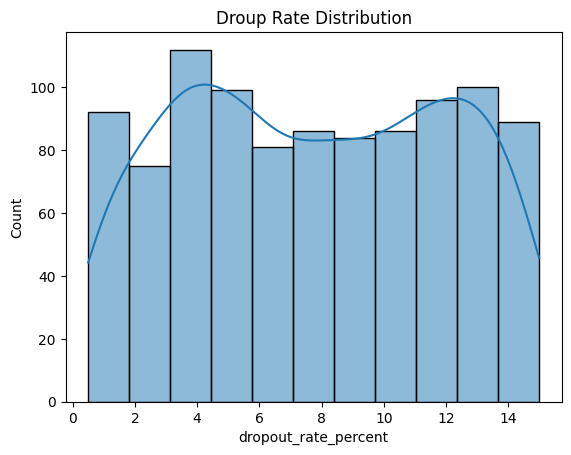

In [7]:
sns.histplot(df['dropout_rate_percent'], kde=True)
plt.title("Droup Rate Distribution")
plt.show()

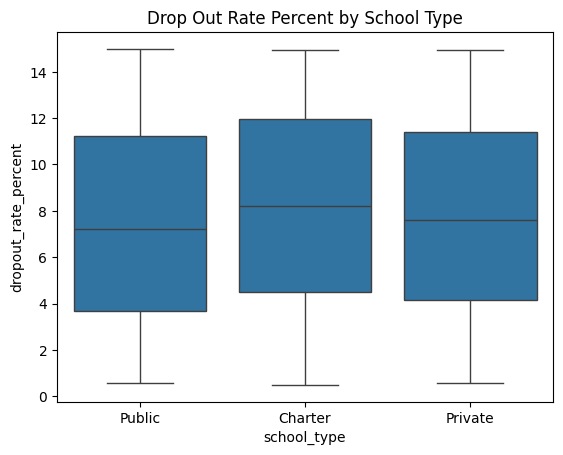

In [8]:
sns.boxplot(x='school_type', y='dropout_rate_percent', data=df)
plt.title("Drop Out Rate Percent by School Type")
plt.show()

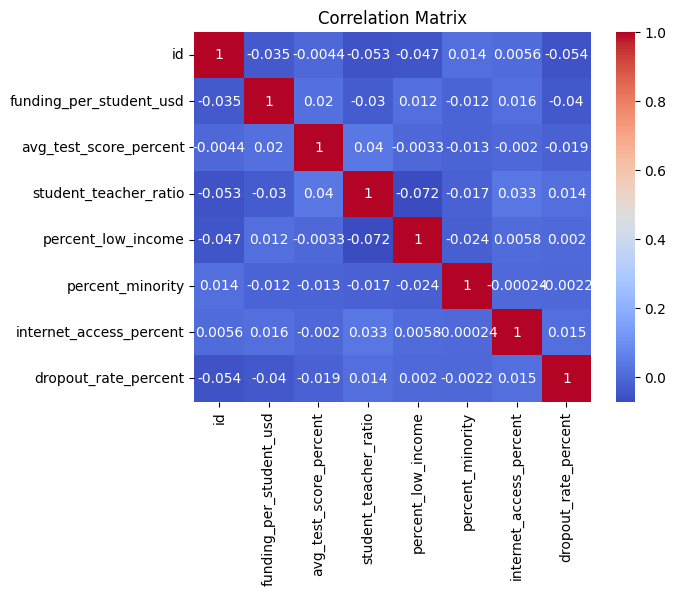

In [9]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [10]:
print(f"One way Anova Test")
model = ols('dropout_rate_percent ~ school_type', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
print("\nOne-Way ANOVA results for Drop Out Rate percent By School Type:")
print(anova_table)

alpha = 0.05
if anova_table['PR(>F)'][0] < alpha:
    print("Reject the null hypothesis. There is a significant difference in drop out rate percent between school types.")
    print("The p-value is:", anova_table['PR(>F)'][0])
else:
    print("Fail to reject the null hypothesis. There is no significant difference in drop out rate percent between school types.")


One way Anova Test
                   sum_sq     df         F    PR(>F)
school_type     70.184727    2.0  1.979618  0.138665
Residual     17673.657313  997.0       NaN       NaN

One-Way ANOVA results for Drop Out Rate percent By School Type:
                   sum_sq     df         F    PR(>F)
school_type     70.184727    2.0  1.979618  0.138665
Residual     17673.657313  997.0       NaN       NaN
Fail to reject the null hypothesis. There is no significant difference in drop out rate percent between school types.


/tmp/ipython-input-635406210.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < alpha:


2 Way ANOVA 
                                     sum_sq     df         F    PR(>F)
C(school_type)                    70.686497    2.0  2.001153  0.135725
C(grade_level)                    57.547890    2.0  1.629195  0.196612
C(school_type):C(grade_level)    113.615553    4.0  1.608242  0.169989
Residual                       17502.493870  991.0       NaN       NaN
Fail to reject the null hypothesis. There is no significant interaction effect between school type and grade level.


/tmp/ipython-input-664999574.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < alpha:


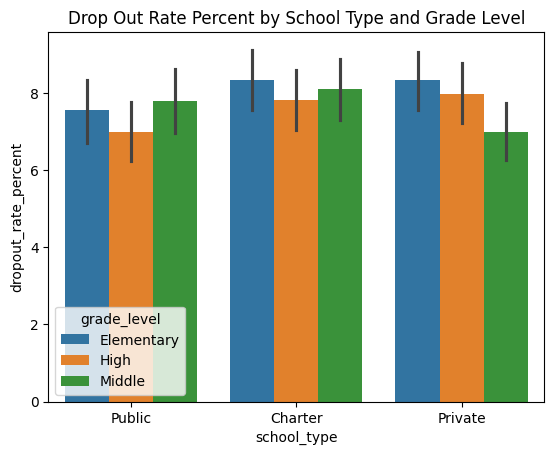

In [11]:
print(f"2 Way ANOVA ")
model = ols('dropout_rate_percent ~ C(school_type) + C(grade_level) + C(school_type):C(grade_level)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

alpha = 0.05
if anova_table['PR(>F)'][0] < alpha:
    print("Reject the null hypothesis. There is a significant interaction effect between school type and grade level.")
    print("The p-value is:", anova_table['PR(>F)'][0])
else:
    print("Fail to reject the null hypothesis. There is no significant interaction effect between school type and grade level.")

sns.barplot(x='school_type', y='dropout_rate_percent', hue='grade_level', data=df)
plt.title("Drop Out Rate Percent by School Type and Grade Level")
plt.show()


In [13]:
print(f"Linear Regression Model To Predict Drop out Rate")
import statsmodels.api as sm
X = df[['funding_per_student_usd', 'avg_test_score_percent', 'percent_low_income',
        'percent_minority', 'internet_access_percent', 'student_teacher_ratio']]
y = df['dropout_rate_percent']

# Add constant
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

Linear Regression Model To Predict Drop out Rate
                             OLS Regression Results                             
Dep. Variable:     dropout_rate_percent   R-squared:                       0.002
Model:                              OLS   Adj. R-squared:                 -0.004
Method:                   Least Squares   F-statistic:                    0.3876
Date:                  Sat, 02 Aug 2025   Prob (F-statistic):              0.887
Time:                          05:49:19   Log-Likelihood:                -2855.8
No. Observations:                  1000   AIC:                             5726.
Df Residuals:                       993   BIC:                             5760.
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

In [24]:
print(f"Testing Randon Forest Regressor")
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X = df[['funding_per_student_usd', 'avg_test_score_percent', 'percent_low_income',
'percent_minority', 'internet_access_percent', 'student_teacher_ratio']]
y = df['dropout_rate_percent']
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))
print(f"Model Performs poorly . Thus Now lets Try Classfication Model")

Testing Randon Forest Regressor
Mean Squared Error: 18.68898810705
R2 Score: -0.09912226787490686
Model Performs poorly . Thus Now lets Try Classfication Model


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X = df[['funding_per_student_usd', 'avg_test_score_percent', 'percent_low_income',
        'percent_minority', 'internet_access_percent', 'student_teacher_ratio']]

df['dropout_category'] = (df['dropout_rate_percent'] > df['dropout_rate_percent'].median()).astype(int)
y = df['dropout_category']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

X_train shape: (800, 6)
X_test shape: (200, 6)
y_train shape: (800,)
y_test shape: (200,)
Accuracy: 0.465


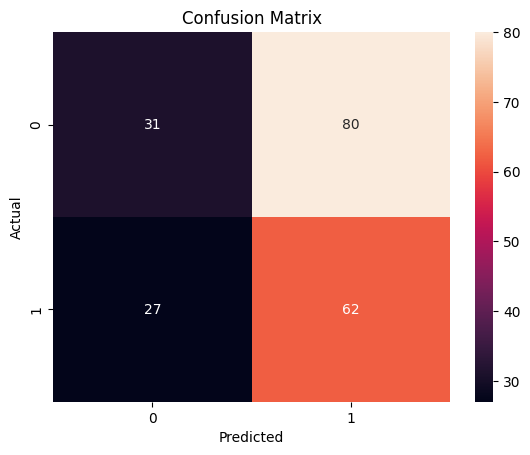

              precision    recall  f1-score   support

           0       0.53      0.28      0.37       111
           1       0.44      0.70      0.54        89

    accuracy                           0.47       200
   macro avg       0.49      0.49      0.45       200
weighted avg       0.49      0.47      0.44       200



In [32]:
from sklearn.metrics import confusion_matrix, classification_report

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#  classification report
print(classification_report(y_test, y_pred))


In [38]:
print(f"lets us try out random forest classifier")
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

lets us try out random forest classifier
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.41      0.47       111
           1       0.43      0.55      0.48        89

    accuracy                           0.47       200
   macro avg       0.48      0.48      0.47       200
weighted avg       0.49      0.47      0.47       200


Random Forest Confusion Matrix:
[[46 65]
 [40 49]]


In [40]:
print(f"now lets move towards XgBoost Classifier")
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred))
print("\nXGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

now lets move towards XgBoost Classifier
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.43      0.48       111
           1       0.42      0.52      0.46        89

    accuracy                           0.47       200
   macro avg       0.47      0.47      0.47       200
weighted avg       0.48      0.47      0.47       200


XGBoost Confusion Matrix:
[[48 63]
 [43 46]]


In [41]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)

print("LightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgbm))
print("\nLightGBM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lgbm))

[LightGBM] [Info] Number of positive: 411, number of negative: 389
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000132 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1415
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.513750 -> initscore=0.055014
[LightGBM] [Info] Start training from score 0.055014
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [43]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [20, 31, 40],
}

grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)


best_lgbm = grid_search.best_estimator_
y_pred_best_lgbm = best_lgbm.predict(X_test)

print("LightGBM Classification Report (with tuned hyperparameters):")
print(classification_report(y_test, y_pred_best_lgbm))
print("\nLightGBM Confusion Matrix (with tuned hyperparameters):")
print(confusion_matrix(y_test, y_pred_best_lgbm))
#Unfortunately, in this case, the hyperparameter tuning did not improve the model's performance. In fact, the accuracy and F1-scores are slightly lower for the tuned model. This can sometimes happen, and it suggests that the default hyperparameters were already quite good for this dataset, or that the features we are using are not predictive enough to achieve higher accuracy

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[LightGBM] [Info] Number of positive: 411, number of negative: 389
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000109 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1415
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.513750 -> initscore=0.055014
[LightGBM] [Info] Start training from score 0.055014
Best parameters found:  {'learning_rate': 0.01, 'n_estimators': 100, 'num_leaves': 20}
LightGBM Classification Report (with tuned hyperparameters):
              precision    recall  f1-score   support

           0       0.54      0.41      0.46       111
           1       0.43      0.56      0.49        89

    accuracy                           0.47       200
   macro avg       0.48      0.48      0.47       200
weighted avg       0.49      0.47 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [44]:
from sklearn.preprocessing import PolynomialFeatures

# New interaction features
df['funding_x_low_income'] = df['funding_per_student_usd'] * df['percent_low_income']
df['student_teacher_x_internet'] = df['student_teacher_ratio'] * df['internet_access_percent']


X = df[['funding_per_student_usd', 'avg_test_score_percent', 'percent_low_income',
        'percent_minority', 'internet_access_percent', 'student_teacher_ratio',
        'funding_x_low_income', 'student_teacher_x_internet']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)


y_pred_lgbm_fe = lgbm.predict(X_test)

print("LightGBM Classification Report (with feature engineering):")
print(classification_report(y_test, y_pred_lgbm_fe))
print("\nLightGBM Confusion Matrix (with feature engineering):")
print(confusion_matrix(y_test, y_pred_lgbm_fe))

[LightGBM] [Info] Number of positive: 411, number of negative: 389
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000141 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1925
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.513750 -> initscore=0.055014
[LightGBM] [Info] Start training from score 0.055014
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


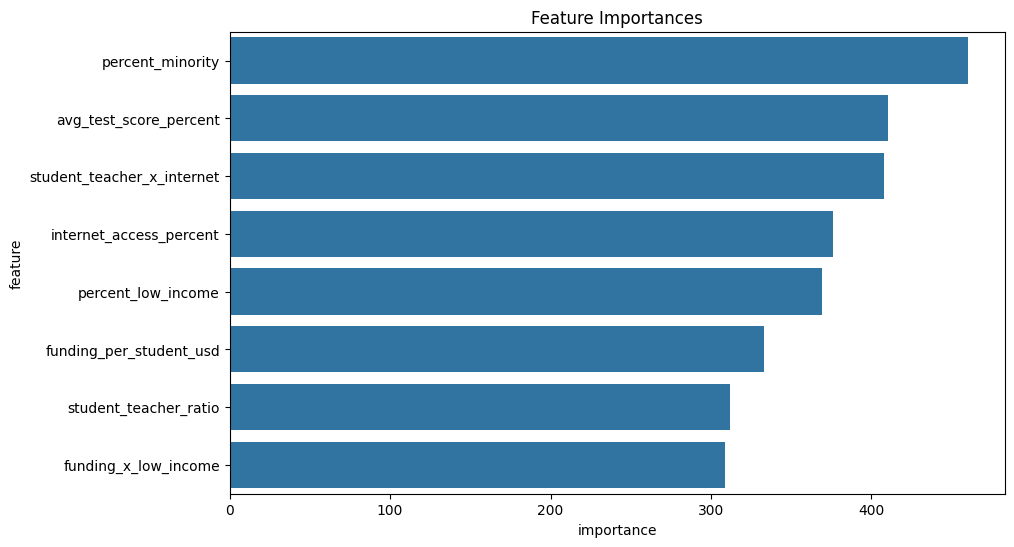

In [45]:
# feature importances from the LightGBM model
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': lgbm.feature_importances_})
feature_importances = feature_importances.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()